## Analysis of IQR method 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## define color palettes
dutchfield = ["#e60049", "#0bb4ff", "#87bc45", "#ef9b20", "#b33dc6"]
springpastel = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"] 

In [4]:
# load the counts
# site_counts = pd.read_csv('/scratch/users/ntu/suffiazi/outputs/tmp/plotting-parallel/output-data/concat_tables/1360_motifs_variable_site_counts-sorted.tsv', sep='\t')
site_counts = pd.read_csv('/data5/msazizan/plotting_data/IQR-region-counts/1360_motifs_variable_site_counts-sorted.tsv', sep='\t')
site_counts

,motif_id,sample_id,max_AF_region_count,max_FPS_region_count
0,AHR_AHR_HUMAN.H11MO.0.B,S6R691V_her2,4,3
1,AHR_AHR_HUMAN.H11MO.0.B,PU24GB8_lumB,4,0
2,AHR_AHR_HUMAN.H11MO.0.B,ANAB5F7_basal,4,17
3,AHR_AHR_HUMAN.H11MO.0.B,98JKPD8_lumA,4,4
4,AHR_AHR_HUMAN.H11MO.0.B,2GAMBDQ_norm,9,1
...,...,...,...,...
6795,ZSCAN5C_M08390_2.00,S6R691V_her2,9,14
6796,ZSCAN5C_M08390_2.00,PU24GB8_lumB,5,4
6797,ZSCAN5C_M08390_2.00,ANAB5F7_basal,7,28
6798,ZSCAN5C_M08390_2.00,98JKPD8_lumA,14,16


In [5]:
# sort sample_id column naturally, by motif_id grouping
site_counts_sorted = site_counts.sort_values(by=['motif_id', 'sample_id'])
site_counts_sorted

,motif_id,sample_id,max_AF_region_count,max_FPS_region_count
4,AHR_AHR_HUMAN.H11MO.0.B,2GAMBDQ_norm,9,1
3,AHR_AHR_HUMAN.H11MO.0.B,98JKPD8_lumA,4,4
2,AHR_AHR_HUMAN.H11MO.0.B,ANAB5F7_basal,4,17
1,AHR_AHR_HUMAN.H11MO.0.B,PU24GB8_lumB,4,0
0,AHR_AHR_HUMAN.H11MO.0.B,S6R691V_her2,4,3
...,...,...,...,...
6799,ZSCAN5C_M08390_2.00,2GAMBDQ_norm,29,2
6798,ZSCAN5C_M08390_2.00,98JKPD8_lumA,14,16
6797,ZSCAN5C_M08390_2.00,ANAB5F7_basal,7,28
6796,ZSCAN5C_M08390_2.00,PU24GB8_lumB,5,4


In [6]:
# sum the total filtered sites where FPS variance is considered outliers, based on AF variance 
sumsite_af_sorted_df = site_counts_sorted.groupby('motif_id')['max_AF_region_count'].sum().sort_values(ascending=False).to_frame()
sumsite_af_sorted_df

,max_AF_region_count
motif_id,
ZNF287_M07590_2.00,1175
ZNF235_M07605_2.00,1147
ZNF432_M07773_2.00,1073
ZN770_ZN770_HUMAN.H11MO.0.C,1032
MAZ_MAZ_HUMAN.H11MO.0.A,998
...,...
ZNF211_M07577_2.00,14
ZNF547_M07600_2.00,13
NOBOX_NOBOX_HUMAN.H11MO.0.C,13


In [7]:
# set categorical order for motif_id
site_counts_sorted['motif_id'] = pd.Categorical(site_counts_sorted['motif_id'], categories=sumsite_af_sorted_df.index, ordered=True)
site_counts_sorted = site_counts_sorted.sort_values(['motif_id', 'sample_id'])
site_counts_sorted

,motif_id,sample_id,max_AF_region_count,max_FPS_region_count
5354,ZNF287_M07590_2.00,2GAMBDQ_norm,453,61
5350,ZNF287_M07590_2.00,98JKPD8_lumA,265,386
5351,ZNF287_M07590_2.00,ANAB5F7_basal,153,500
5352,ZNF287_M07590_2.00,PU24GB8_lumB,170,78
5353,ZNF287_M07590_2.00,S6R691V_her2,134,150
...,...,...,...,...
6270,ZNF669_M08262_2.00,2GAMBDQ_norm,0,0
6271,ZNF669_M08262_2.00,98JKPD8_lumA,1,0
6272,ZNF669_M08262_2.00,ANAB5F7_basal,1,2
6273,ZNF669_M08262_2.00,PU24GB8_lumB,0,0


In [8]:
# Pivot the DataFrame so that each 'sample_id' is a column
pivot_df = site_counts_sorted.pivot(index='motif_id', columns='sample_id', values='max_AF_region_count').fillna(0)
pivot_df

sample_id,2GAMBDQ_norm,98JKPD8_lumA,ANAB5F7_basal,PU24GB8_lumB,S6R691V_her2
motif_id,,,,,
ZNF287_M07590_2.00,453,265,153,170,134
ZNF235_M07605_2.00,430,251,158,162,146
ZNF432_M07773_2.00,398,229,153,134,159
ZN770_ZN770_HUMAN.H11MO.0.C,407,209,144,131,141
MAZ_MAZ_HUMAN.H11MO.0.A,384,220,148,116,130
...,...,...,...,...,...
ZNF211_M07577_2.00,6,3,3,1,1
ZNF547_M07600_2.00,4,3,1,2,3
NOBOX_NOBOX_HUMAN.H11MO.0.C,6,2,2,2,1


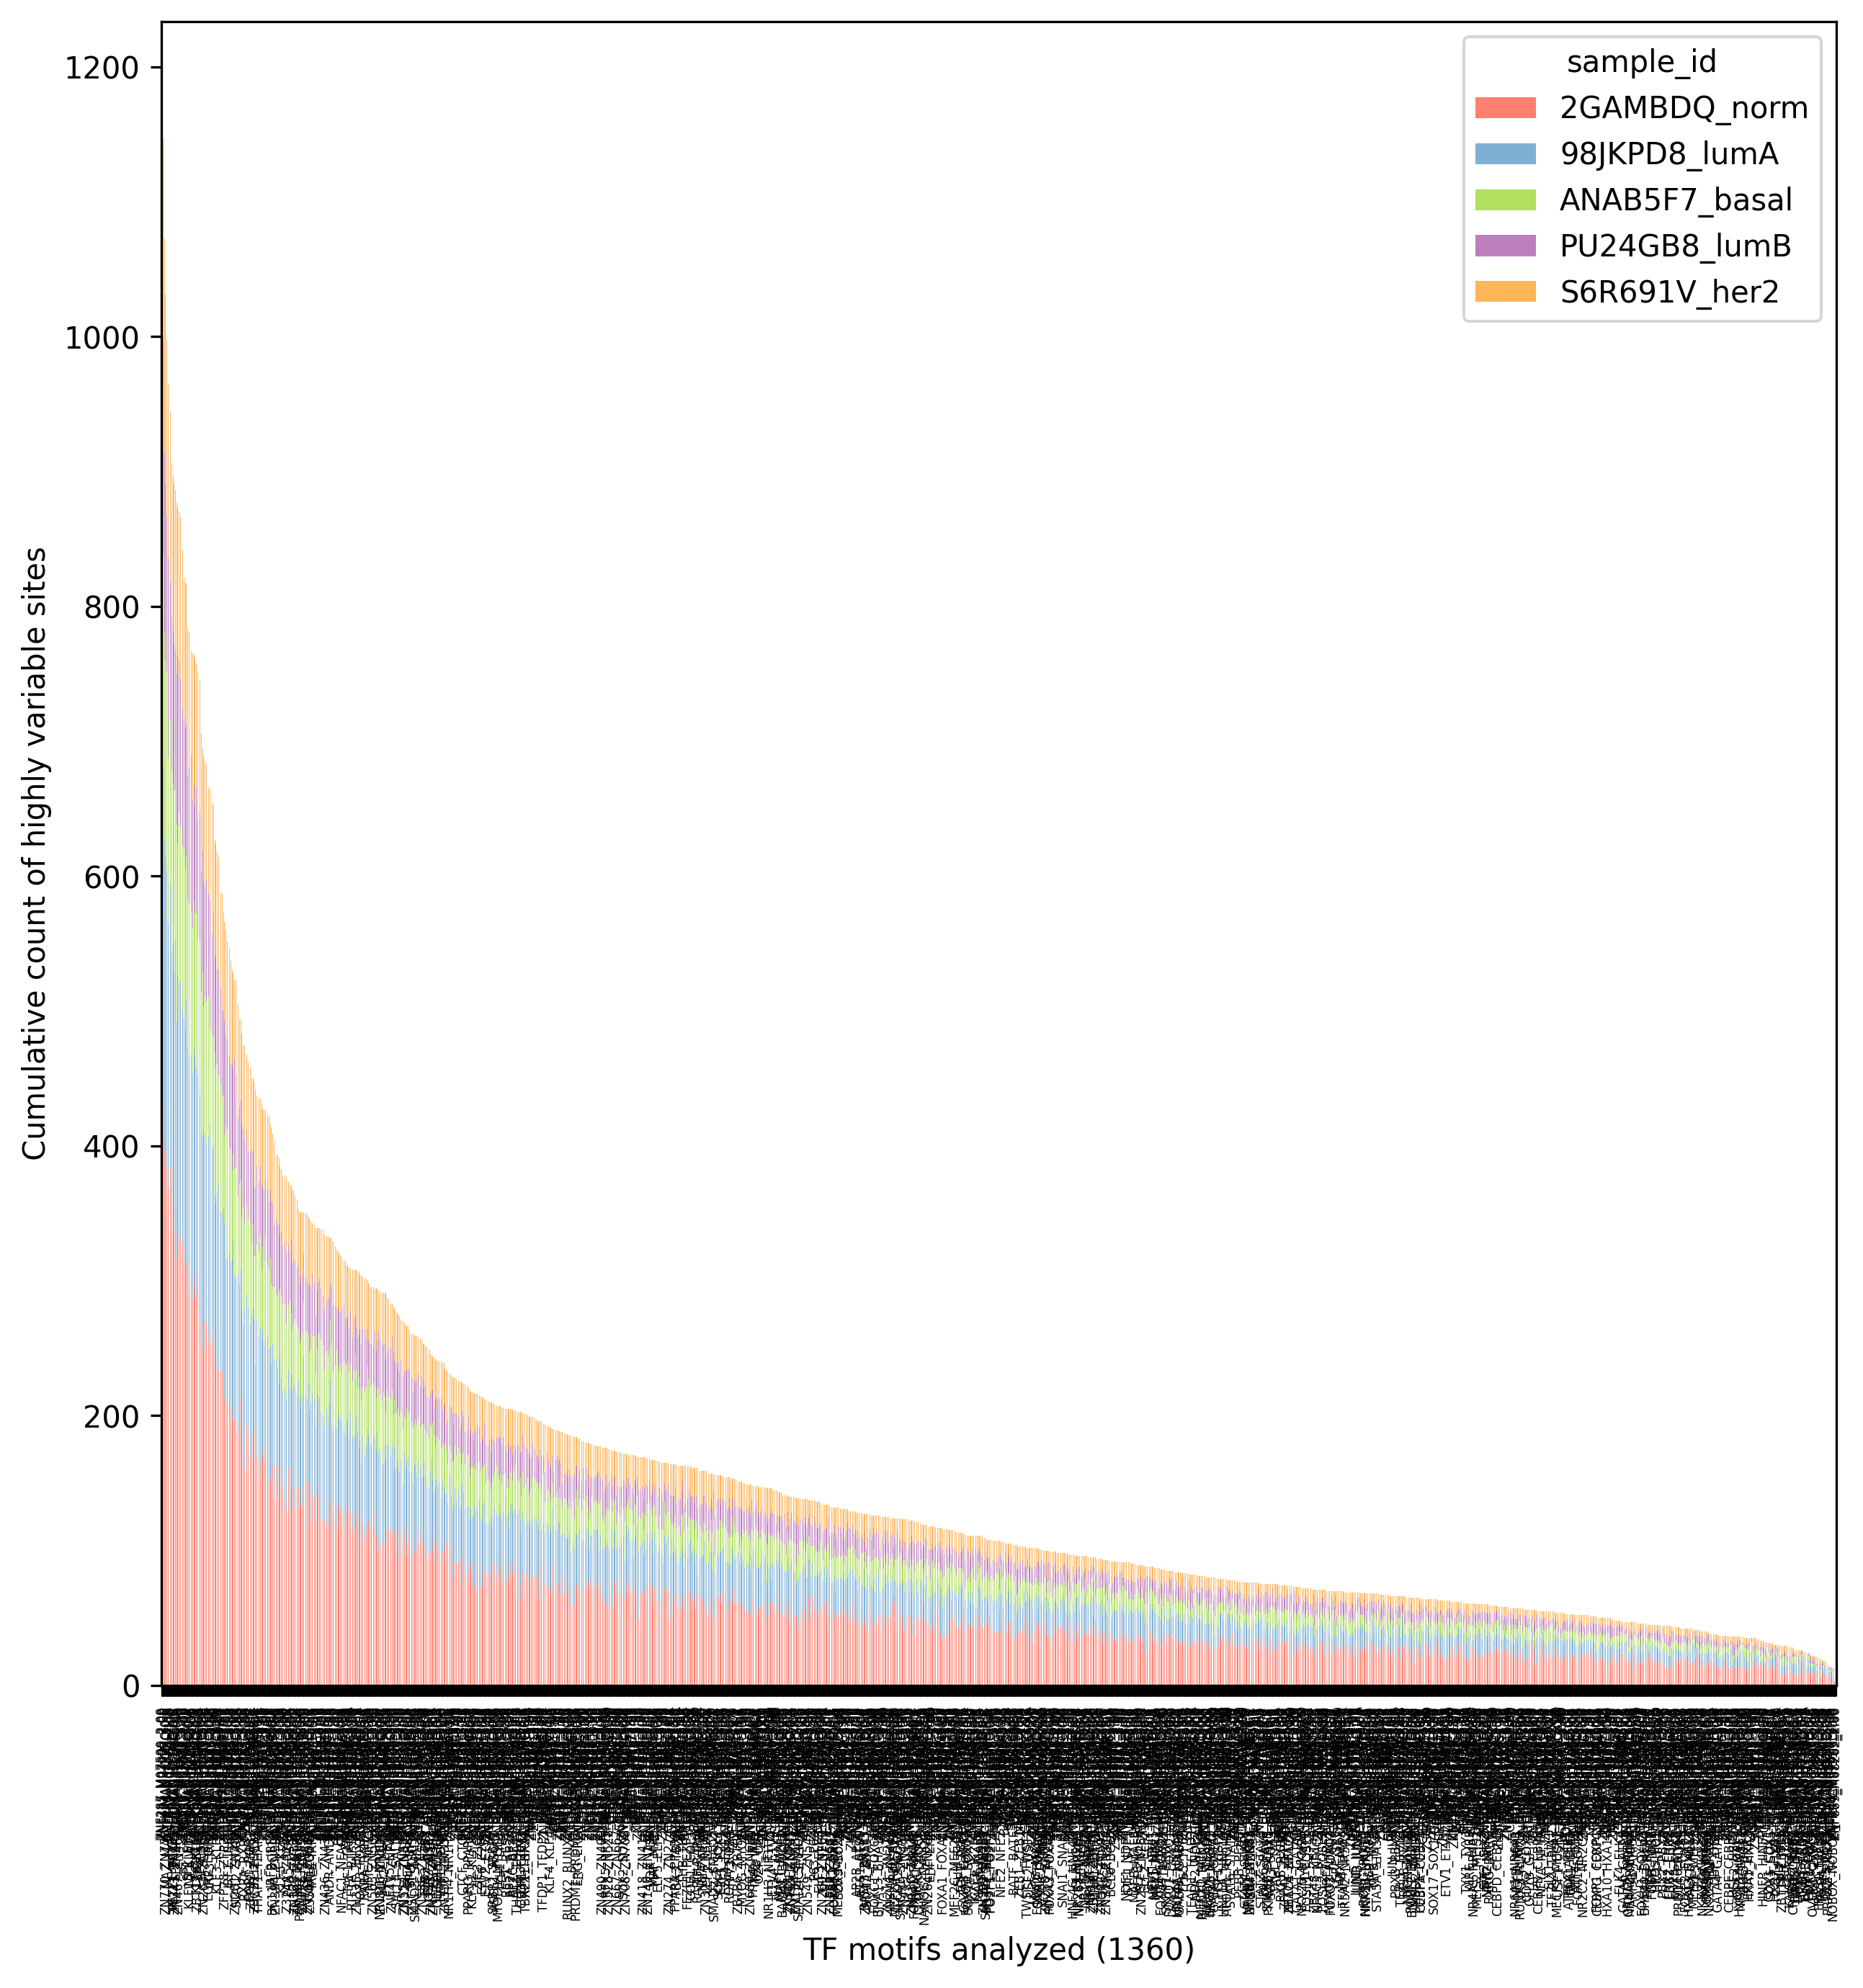

In [9]:
# Pivot the DataFrame so that each 'sample_id' is a column
pivot_df = site_counts_sorted.pivot(index='motif_id', columns='sample_id', values='max_AF_region_count').fillna(0)

# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Cumulative count of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df.index.nunique()})', fontsize=10)
plt.show()

In [10]:
# truncate df to just top 5% motifs
# 1360 motifs * 0.05 = 68 motifs
site_counts_sorted_top5 = site_counts_sorted.iloc[:(68*5)].copy().reset_index(drop=True)
site_counts_sorted_top5

,motif_id,sample_id,max_AF_region_count,max_FPS_region_count
0,ZNF287_M07590_2.00,2GAMBDQ_norm,453,61
1,ZNF287_M07590_2.00,98JKPD8_lumA,265,386
2,ZNF287_M07590_2.00,ANAB5F7_basal,153,500
3,ZNF287_M07590_2.00,PU24GB8_lumB,170,78
4,ZNF287_M07590_2.00,S6R691V_her2,134,150
...,...,...,...,...
335,RXRA_RXRA_HUMAN.H11MO.0.A,2GAMBDQ_norm,160,19
336,RXRA_RXRA_HUMAN.H11MO.0.A,98JKPD8_lumA,119,220
337,RXRA_RXRA_HUMAN.H11MO.0.A,ANAB5F7_basal,63,152
338,RXRA_RXRA_HUMAN.H11MO.0.A,PU24GB8_lumB,62,34


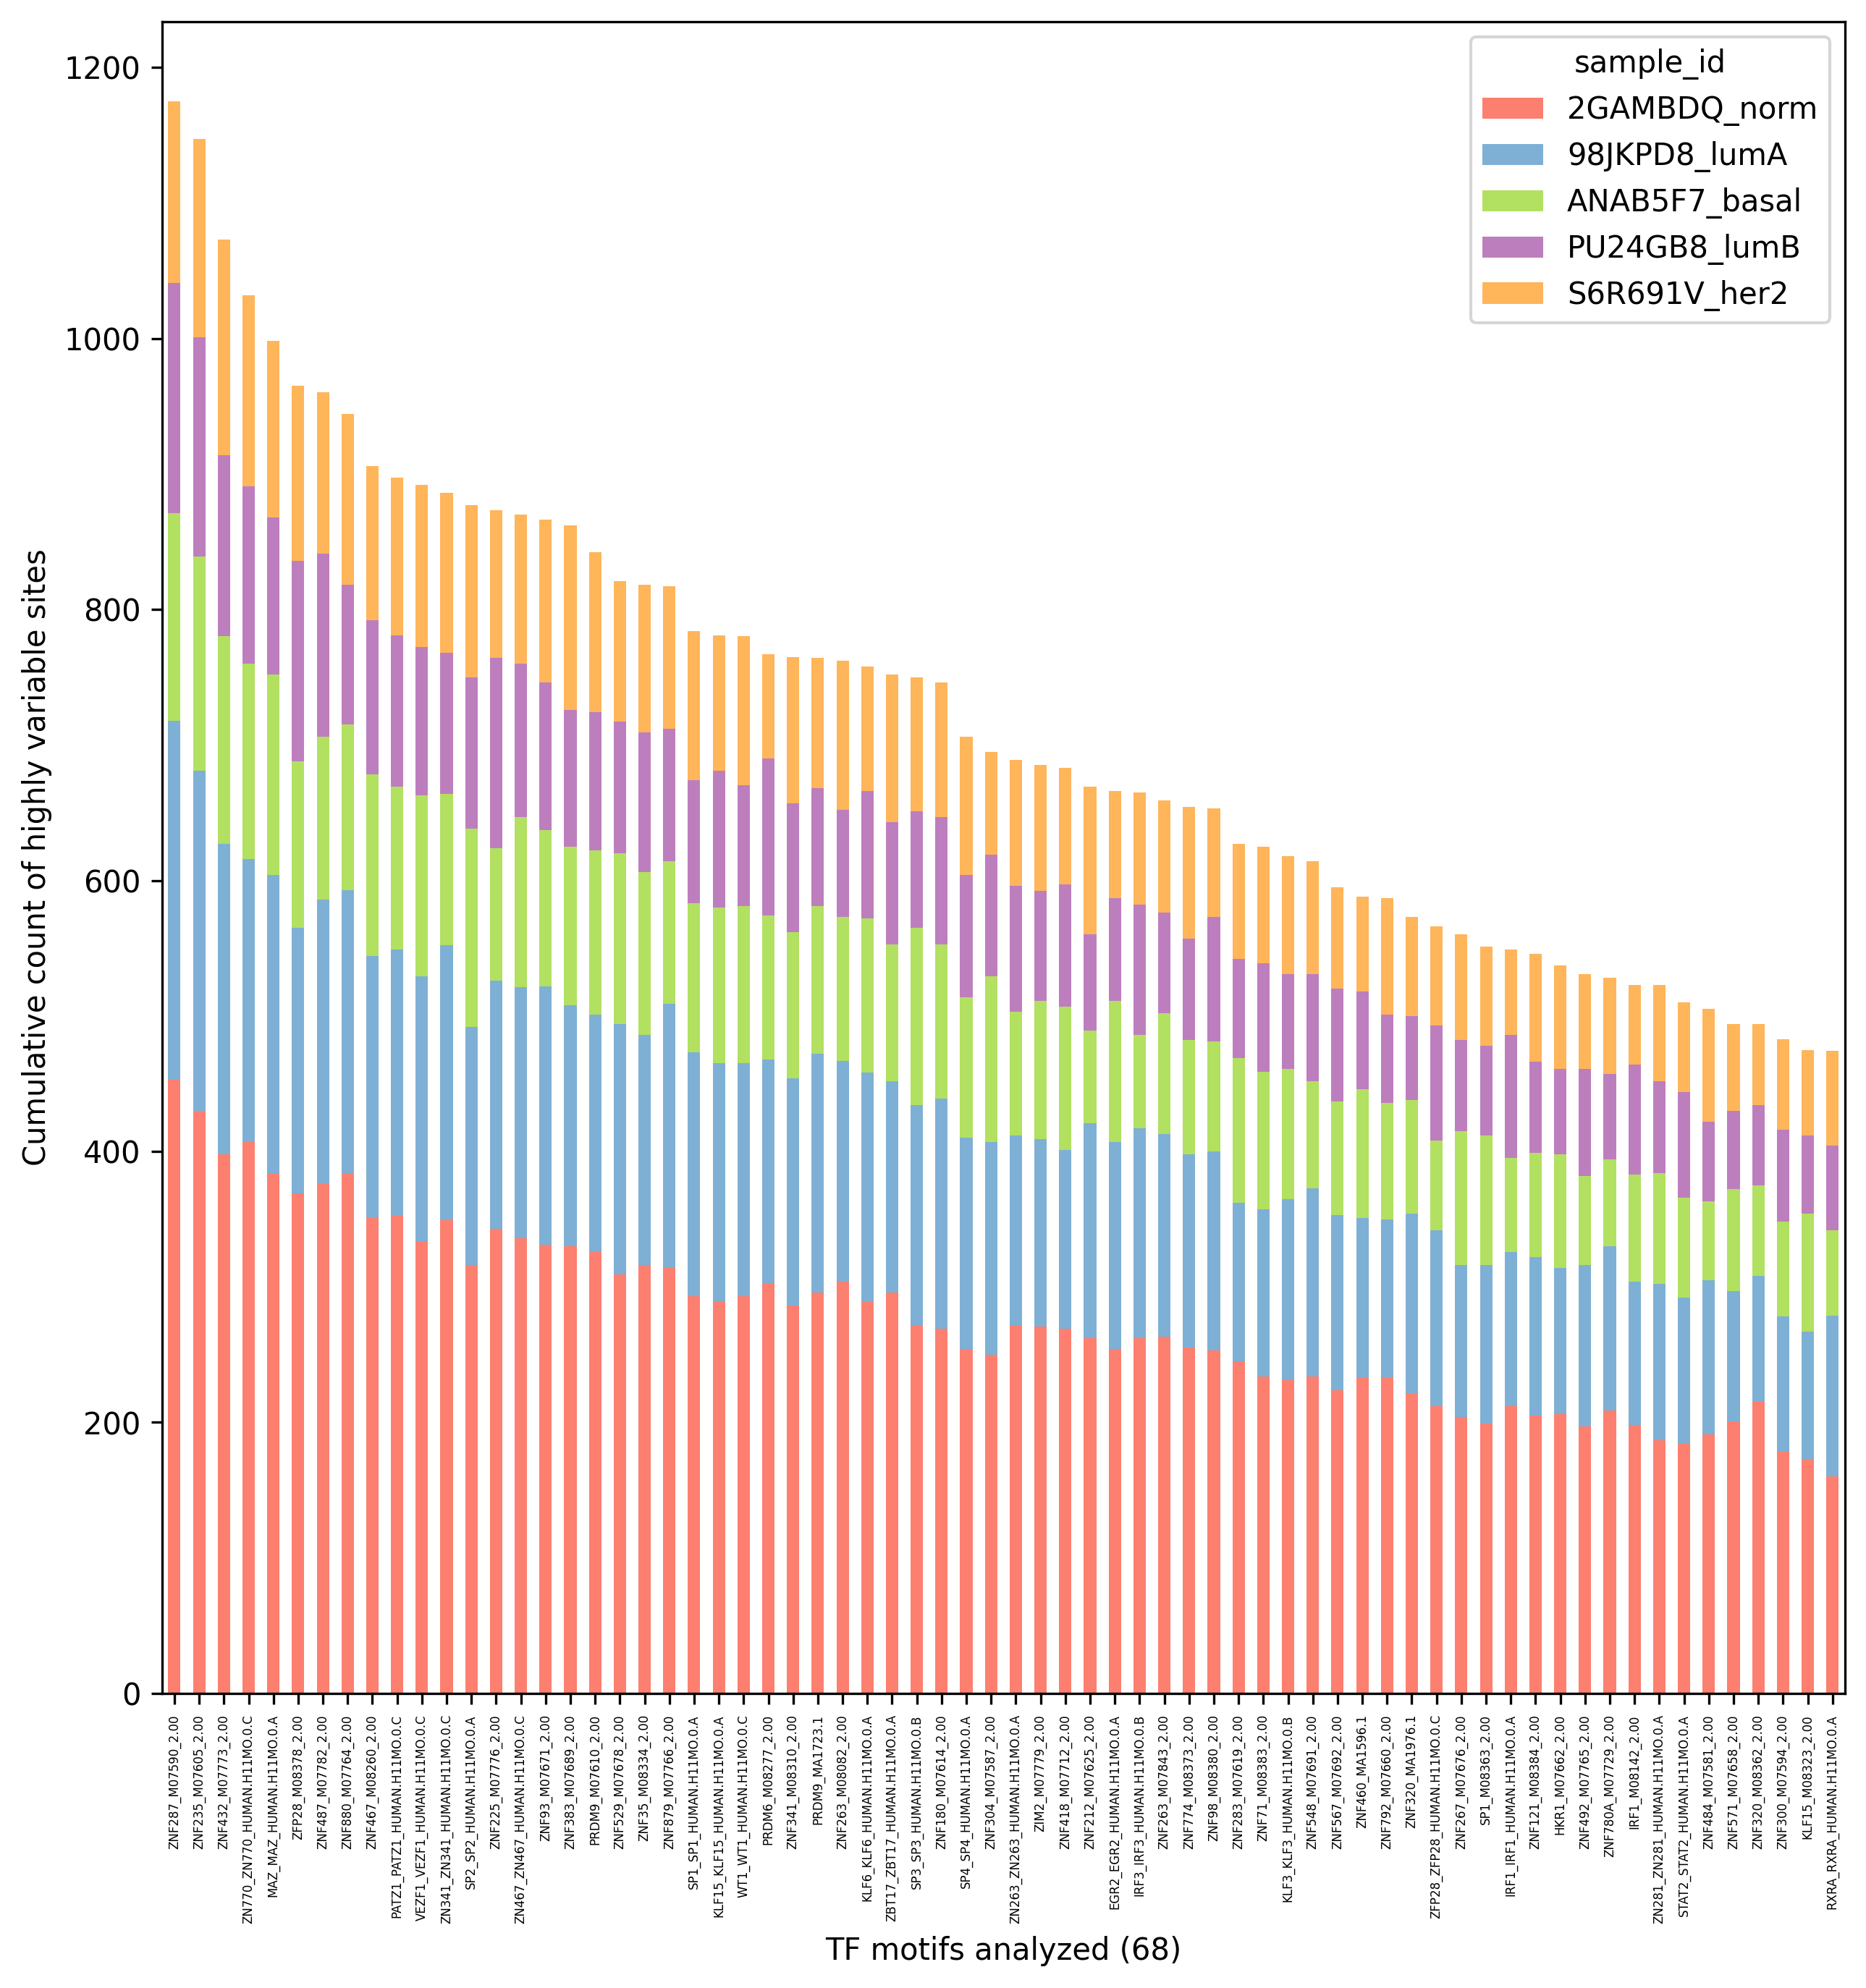

In [11]:
# Pivot the DataFrame so that each 'sample_id' is a column
pivot_df_trunc = site_counts_sorted_top5.pivot(index='motif_id', columns='sample_id', values='max_AF_region_count').fillna(0)

# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df_trunc.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Cumulative count of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df_trunc.index.nunique()})', fontsize=10)
plt.show()

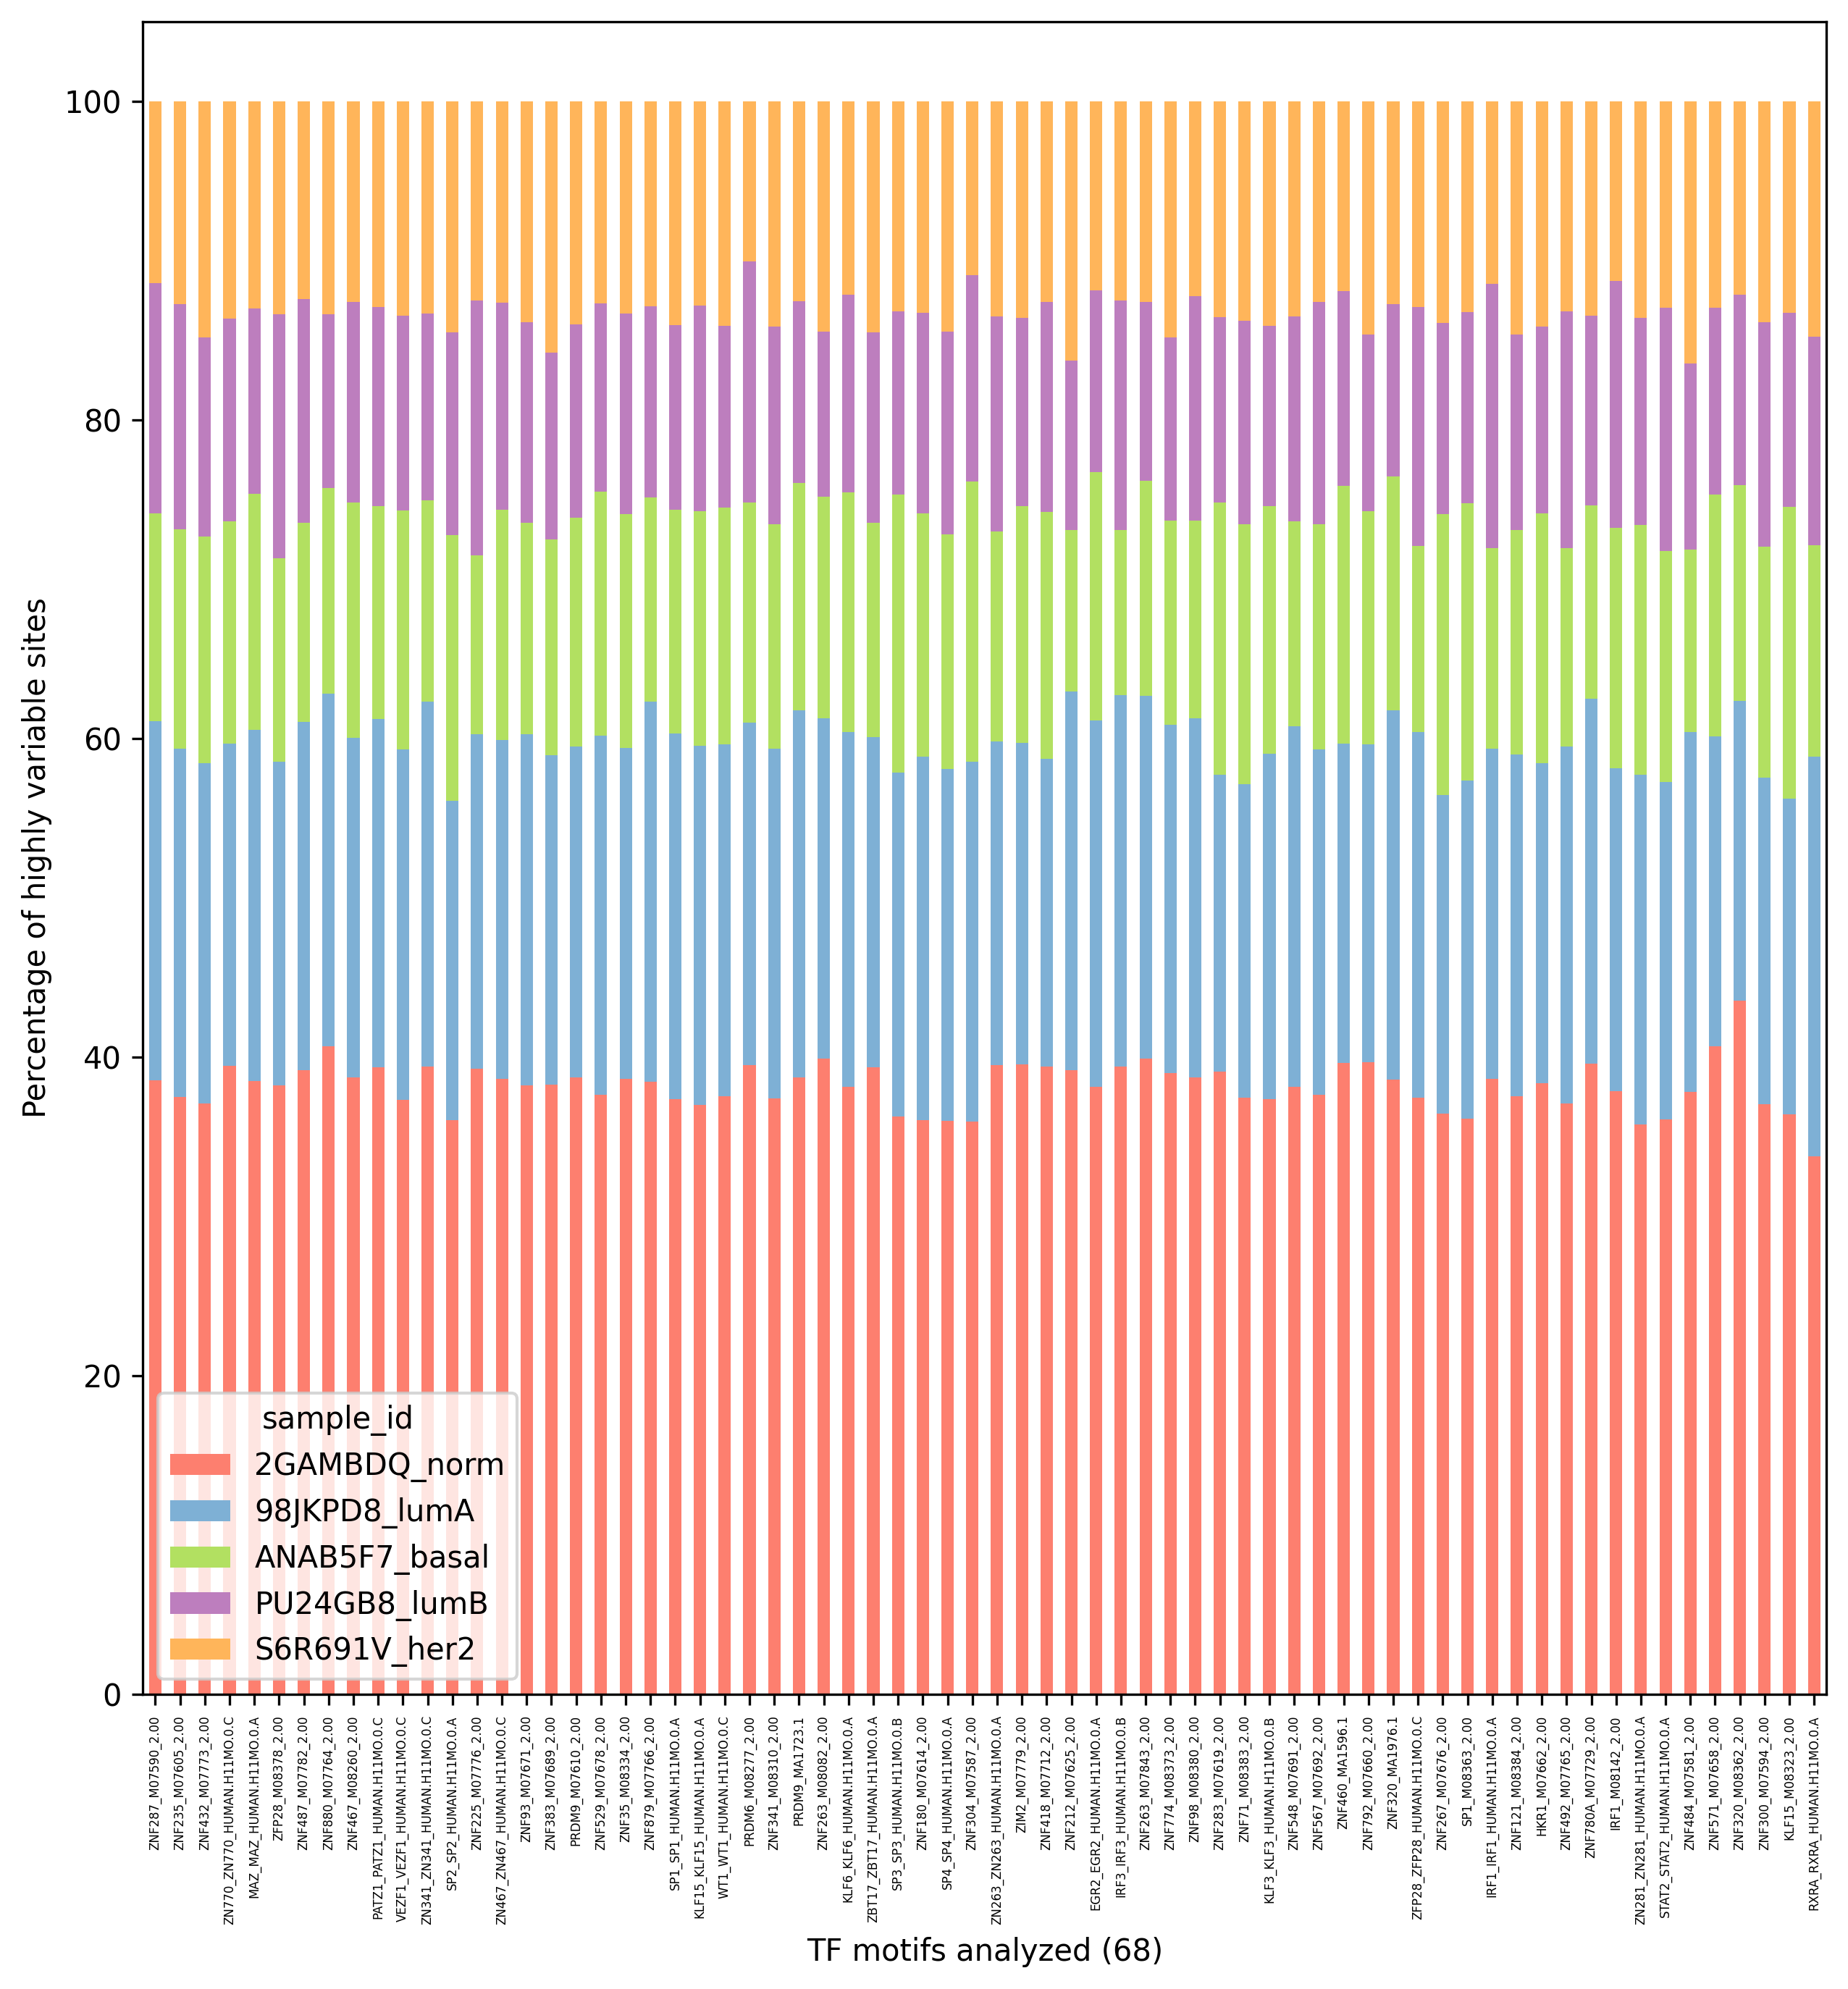

In [12]:
# Calculate the sum for each 'motif_id'
sums = pivot_df_trunc.sum(axis=1)

# Divide each 'max_AF_region_count' by the sum and multiply by 100 to get percentages
pivot_df_trunc = pivot_df_trunc.div(sums, axis=0) * 100

# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df_trunc.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Percentage of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df_trunc.index.nunique()})', fontsize=10)
plt.show()

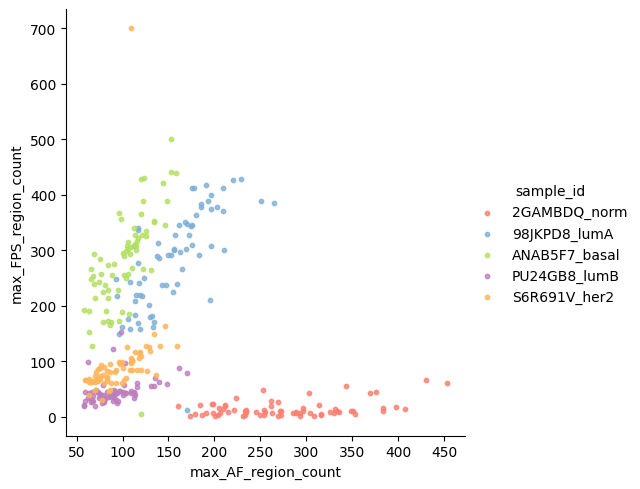

In [13]:
# plot jointplot of site_counts_sorted_top5
sns.lmplot(x='max_AF_region_count', y='max_FPS_region_count', data=site_counts_sorted_top5, hue ='sample_id', fit_reg=False, palette=springpastel, scatter_kws={'s': 10})


In [14]:
# plot the df
pivot_df

sample_id,2GAMBDQ_norm,98JKPD8_lumA,ANAB5F7_basal,PU24GB8_lumB,S6R691V_her2
motif_id,,,,,
ZNF287_M07590_2.00,453,265,153,170,134
ZNF235_M07605_2.00,430,251,158,162,146
ZNF432_M07773_2.00,398,229,153,134,159
ZN770_ZN770_HUMAN.H11MO.0.C,407,209,144,131,141
MAZ_MAZ_HUMAN.H11MO.0.A,384,220,148,116,130
...,...,...,...,...,...
ZNF211_M07577_2.00,6,3,3,1,1
ZNF547_M07600_2.00,4,3,1,2,3
NOBOX_NOBOX_HUMAN.H11MO.0.C,6,2,2,2,1


In [15]:
site_counts_sorted

,motif_id,sample_id,max_AF_region_count,max_FPS_region_count
5354,ZNF287_M07590_2.00,2GAMBDQ_norm,453,61
5350,ZNF287_M07590_2.00,98JKPD8_lumA,265,386
5351,ZNF287_M07590_2.00,ANAB5F7_basal,153,500
5352,ZNF287_M07590_2.00,PU24GB8_lumB,170,78
5353,ZNF287_M07590_2.00,S6R691V_her2,134,150
...,...,...,...,...
6270,ZNF669_M08262_2.00,2GAMBDQ_norm,0,0
6271,ZNF669_M08262_2.00,98JKPD8_lumA,1,0
6272,ZNF669_M08262_2.00,ANAB5F7_basal,1,2
6273,ZNF669_M08262_2.00,PU24GB8_lumB,0,0


Let's find the common rows from the dataframe of unique regions of maximum AF subtype and the dataframe of unique regions of maximum FPS subtype. To get the whole set of data per motif id, we will need to write a script, but below is the testing done using the data for AHR motif id.


In [16]:
max_fps_regions_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-IQR/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_max_fps-scaled_region-ids_unique.tsv', sep='\t')
max_fps_regions_df

,region_id,sample_id
0,chr18:79988522-79988531,ANAB5F7_basal
1,chr3:52852394-52852403,2GAMBDQ_norm
2,chr21:39385956-39385965,ANAB5F7_basal
3,chr3:150348670-150348679,ANAB5F7_basal
4,chr12:95003775-95003784,ANAB5F7_basal
5,chr2:129178528-129178537,ANAB5F7_basal
6,chr2:215216976-215216985,S6R691V_her2
7,chr3:136819540-136819549,ANAB5F7_basal
8,chr9:104747383-104747392,98JKPD8_lumA
9,chr2:73050387-73050396,ANAB5F7_basal


In [17]:
max_af_regions_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-IQR/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_max_af_region-ids_unique.tsv', sep='\t')
max_af_regions_df

,region_id,sample_id
0,chr18:79988522-79988531,98JKPD8_lumA
1,chr3:52852394-52852403,2GAMBDQ_norm
2,chr21:39385956-39385965,S6R691V_her2
3,chr3:150348670-150348679,2GAMBDQ_norm
4,chr12:95003775-95003784,ANAB5F7_basal
5,chr2:129178528-129178537,PU24GB8_lumB
6,chr2:215216976-215216985,2GAMBDQ_norm
7,chr3:136819540-136819549,S6R691V_her2
8,chr9:104747383-104747392,2GAMBDQ_norm
9,chr2:73050387-73050396,PU24GB8_lumB


In [18]:
# Assuming df1 and df2 are your two DataFrames
common_rows = max_fps_regions_df.merge(max_af_regions_df, on=['region_id', 'sample_id'], how='inner')
common_rows

,region_id,sample_id
0,chr3:52852394-52852403,2GAMBDQ_norm
1,chr12:95003775-95003784,ANAB5F7_basal
2,chr10:127346001-127346010,98JKPD8_lumA
3,chr2:227848456-227848465,ANAB5F7_basal
4,chr7:6855218-6855227,ANAB5F7_basal


Now that the bulk script `AF_FPS_common-max-region-extraction.py` has been run, we can load the concatenated data.

In [19]:
# load concatenated table
concat_df = pd.read_csv('/data5/msazizan/plotting_data/IQR-region-counts/All-motifs_common_max_AF-FPS_regions.tsv', sep='\t')
concat_df

,motif_id,region_id,sample_id
0,ZNF8_ZNF8_HUMAN.H11MO.0.C,chr12:80877312-80877334,2GAMBDQ_norm
1,ZNF8_ZNF8_HUMAN.H11MO.0.C,chr16:87966899-87966921,98JKPD8_lumA
2,ZNF8_ZNF8_HUMAN.H11MO.0.C,chr8:127801832-127801854,98JKPD8_lumA
3,ZNF8_ZNF8_HUMAN.H11MO.0.C,chr8:100465713-100465735,S6R691V_her2
4,ZNF8_ZNF8_HUMAN.H11MO.0.C,chr3:43624736-43624758,ANAB5F7_basal
...,...,...,...
34108,CTCFL_MA1102.2,chr18:48357207-48357219,98JKPD8_lumA
34109,CTCFL_MA1102.2,chr10:123559521-123559533,ANAB5F7_basal
34110,CTCFL_MA1102.2,chr1:84772522-84772534,98JKPD8_lumA
34111,CTCFL_MA1102.2,chr8:22757860-22757872,2GAMBDQ_norm


In [20]:
# count the number of regions when grouped by motif_id 
concat_df.groupby('motif_id')['region_id'].nunique().sort_values(ascending=False).to_frame()

,region_id
motif_id,
ZNF235_M07605_2.00,211
ZNF287_M07590_2.00,202
ZNF432_M07773_2.00,178
ZN770_ZN770_HUMAN.H11MO.0.C,166
ZNF487_M07782_2.00,163
...,...
MEF2A_M08212_2.00,1
DUX4_M08135_2.00,1
CUX1_CUX1_HUMAN.H11MO.0.C,1


In [ ]:
# it seems like there are 2 motifs that have 0 common regions between max_AF and max_FPS